#### Main Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 25.4MB/s]


In [ ]:
# Importing data
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# percentage of Null values for Every Attribute -

null_count = pd.DataFrame(df.isna().sum(), columns=["null_count"])
null_count["null_percentage"] = round(null_count*100/df.shape[0],2)
null_count[null_count["null_count"]>0]

,null_count,null_percentage
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
rating,4,0.05
duration,3,0.03


Insight -- The Missing value percentage of Director, cast, country, date_added, rating, duration is 29.91%, 9.37%, 9.44%, 0.11%, 0.05%, 0.03% respectively. We can observe that highest number of missing values are for the attributes director, cast and then country.

Recomendation -- We can replace the missing values for categorical data with the mode value and numerical value with the median value for the respective country.
For example for country india , if the cast is missing and we have overall mode value of cast for entire dataset as "Tom cruise" then we cannot blindly replace it with "Tom cruise". we must replace it with the mode value for India.


Goal of this case study -
Pin down those countries and kind of shows for which netflix should focus more.
strategies that can assist in increasing the quantity of content on Netflix

COMMON FUNCTIONS USED ACROSS

1. Get count and percentage
2. Plot bar chart using seaborn

In [ ]:
def get_count_and_pct(df, col):
  """
  Get count and percentage values of a column in dataframe
  """
  df_pct = pd.DataFrame(df[col].value_counts(normalize=True)).reset_index()
  if type(col)== str:
    df_pct.columns = [col, "pct"]
  else:
    df_pct.columns = [*col, "pct"]
  return df_pct

def plot_bar_graph(df, x_val, y_val, hue_val = ""):
  plot = sns.barplot(data=df, x=x_val, y=y_val)
  if hue_val != "":
    plot = sns.barplot(data=df, x=x_val, y=y_val, hue=hue_val)

  show_values_on_bars(plot)

def show_values_on_bars(axs, gap=.01, orientation="vertical"):
    def _show_on_single_plot(ax):
        if orientation == "vertical":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orientation == "horizontal":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(gap)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
get_count_and_pct(df, 'country')

,country,pct
0,United States,0.353310
1,India,0.121866
2,United Kingdom,0.052533
3,Japan,0.030717
4,South Korea,0.024950
...,...,...
743,"Romania, Bulgaria, Hungary",0.000125
744,"Uruguay, Guatemala",0.000125
745,"France, Senegal, Belgium",0.000125
746,"Mexico, United States, Spain, Colombia",0.000125


In [ ]:
# We need to split the countries since its considering group of countries as one unit while calculating the percentage.

df["country_list"] = df["country"].str.split(', ')
df["country_list"]

0       [United States]
1        [South Africa]
2                   NaN
3                   NaN
4               [India]
             ...       
8802    [United States]
8803                NaN
8804    [United States]
8805    [United States]
8806            [India]
Name: country_list, Length: 8807, dtype: object

In [ ]:
# expanding the data based on the list of countries to get the title count based on country
country_fe_df = df[["show_id","type","title","country_list","country"]].explode('country_list')
country_fe_df.tail(7)

# we can see same show_id -s8802 for the title - Zinzana

,show_id,type,title,country_list,country
8801,s8802,Movie,Zinzana,United Arab Emirates,"United Arab Emirates, Jordan"
8801,s8802,Movie,Zinzana,Jordan,"United Arab Emirates, Jordan"
8802,s8803,Movie,Zodiac,United States,United States
8803,s8804,TV Show,Zombie Dumb,NaN,NaN
8804,s8805,Movie,Zombieland,United States,United States
8805,s8806,Movie,Zoom,United States,United States
8806,s8807,Movie,Zubaan,India,India


In [ ]:
country_df = get_count_and_pct(country_fe_df, 'country_list')
country_df.head()

,country_list,pct
0,United States,0.368384
1,India,0.104454
2,United Kingdom,0.080288
3,Canada,0.044438
4,France,0.039245


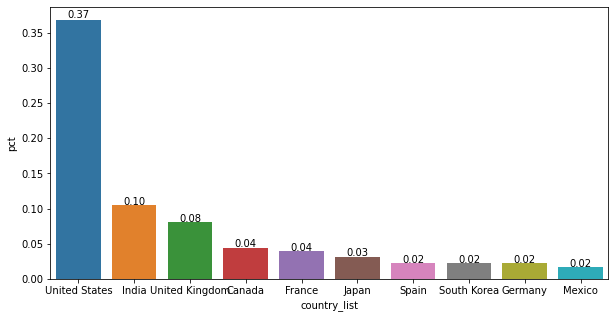

In [ ]:
country = 10
plt.figure(figsize=(10,5))
plot_bar_graph(country_df.head(country), "country_list", "pct")

We can observe the change of percent for every country once we did the exploding for the country list. ( US changed to .36 from .35 and INDIA changed to 0.104 from 0.12 )

#### Problem 2. What type of content is available in different countries?

Univariate Analysis

In [ ]:
country_fe_df

,show_id,type,title,country_list,country
0,s1,Movie,Dick Johnson Is Dead,United States,United States
1,s2,TV Show,Blood & Water,South Africa,South Africa
2,s3,TV Show,Ganglands,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN
4,s5,TV Show,Kota Factory,India,India
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,United States
8803,s8804,TV Show,Zombie Dumb,NaN,NaN
8804,s8805,Movie,Zombieland,United States,United States
8805,s8806,Movie,Zoom,United States,United States


In [ ]:
type_df = get_count_and_pct(country_fe_df, ["type"])
type_df.head()

,type,pct
0,Movie,0.720516
1,TV Show,0.279484


**Insight** -- *We can deduce precisely that 72% of the content on netflix is movies and the rest 27% is TV Shows.*

Recomendation -- We can focus more on TV shows and try to increase its data.

Bivariate: type and country wise analysis

In [ ]:
type_country_df = get_count_and_pct(country_fe_df, ["type","country_list"])
type_country_df.head()

,type,country_list,pct
0,Movie,United States,0.274715
1,Movie,India,0.096066
2,TV Show,United States,0.093669
3,Movie,United Kingdom,0.053126
4,Movie,Canada,0.031855


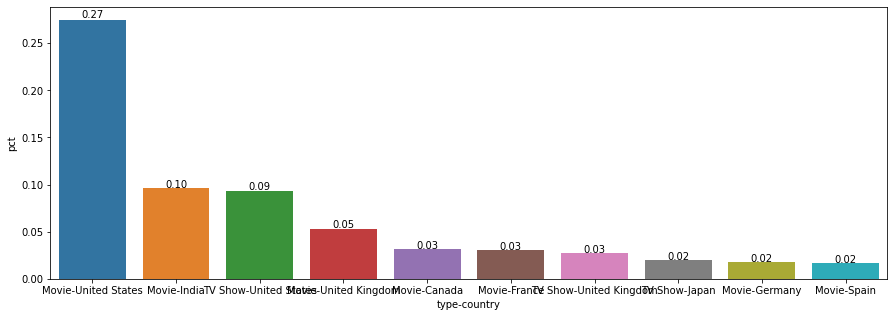

In [ ]:
top_countries = 10
plt.figure(figsize=(15,5))
type_country_df["type-country"] = type_country_df["type"] + "-" + type_country_df["country_list"]
plot_bar_graph(type_country_df.head(top_countries), "type-country", "pct");

**INSIGHTS**

1. US has the `highest consumption of Movies` content `27.4%` followed by India and UK
2. TV Show are less consumed in comparision to Movies but the highest consumer base of TV shows is in US.
3. US has `18% more consumption of movies compared to TV Shows`.

#### Problem 3. How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
min_year, max_year = df['release_year'].min(), df['release_year'].max()
min_year, max_year

(1925, 2021)

Insigts: *Content published on netflix ranges from 1925-2021*

In [ ]:
# last 30 years time frame
last_30_year = max_year - 30
last_30_year

1991

In [ ]:
# find out content type for last 30 years
release_type_df = df.groupby(['release_year','type'], as_index=False)[['title']].nunique()
release_type_df_last_30 = release_type_df[release_type_df['release_year']>=last_30_year]
release_type_df_last_30_movie = release_type_df_last_30[release_type_df_last_30['type'] == 'Movie']
release_type_df_last_30_show = release_type_df_last_30[release_type_df_last_30['type'] == 'TV Show']

In [ ]:
release_type_df_last_30_movie.head()

,release_year,type,title
57,1991,Movie,16
59,1992,Movie,20
61,1993,Movie,24
63,1994,Movie,20
65,1995,Movie,23


In [ ]:
release_type_df_last_30_show.head()

,release_year,type,title
58,1991,TV Show,1
60,1992,TV Show,3
62,1993,TV Show,4
64,1994,TV Show,2
66,1995,TV Show,2


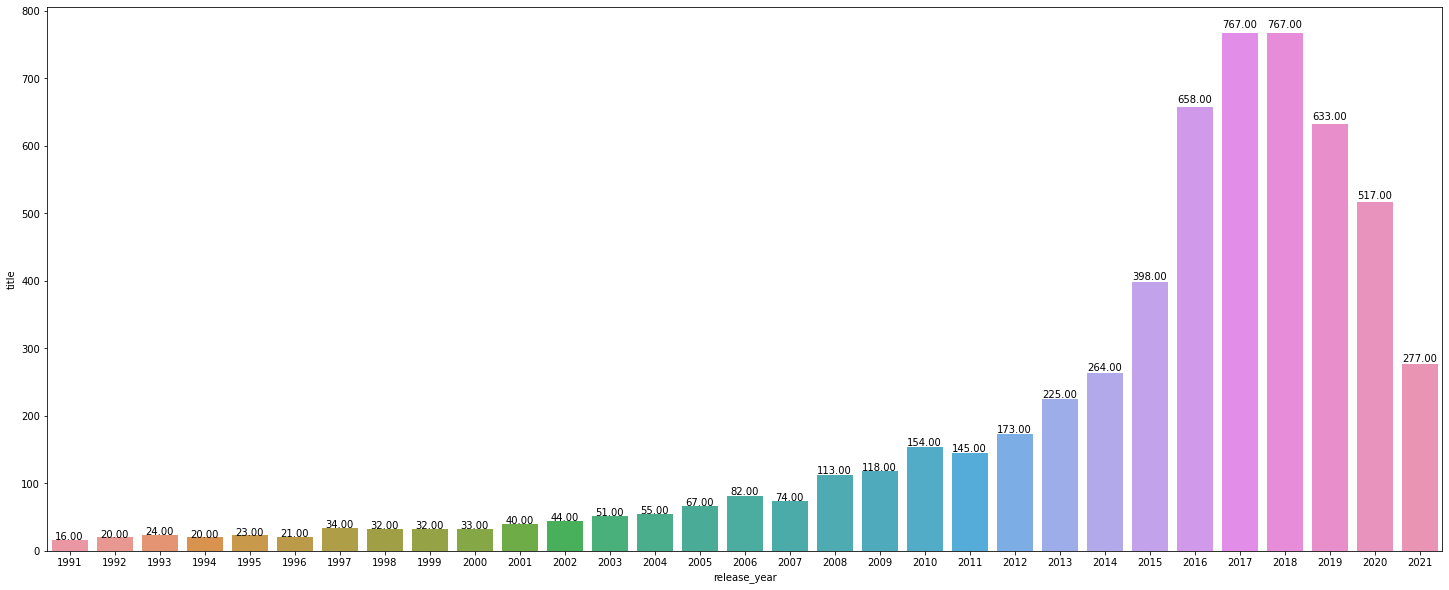

In [ ]:
plt.figure(figsize=(25,10))
plot_bar_graph(release_type_df_last_30_movie, 'release_year', 'title')

**INSIGHTS**

MOVIES

1. There was a drastic rise in movies as a content year on year till 2017.
2. Stark rise of movies was observed in year 2014+ till 2017 (*from 264 to 767*)
3. It was observed that from 2017 movies content started decreasing gradually.
4. As of 2021 is concerned we are closely to the same numbers as that of year 2014. (277)

Nutshell: Content type Movies scaled up drastically from year 2014-2017 and then had a downfall from 2018-2021


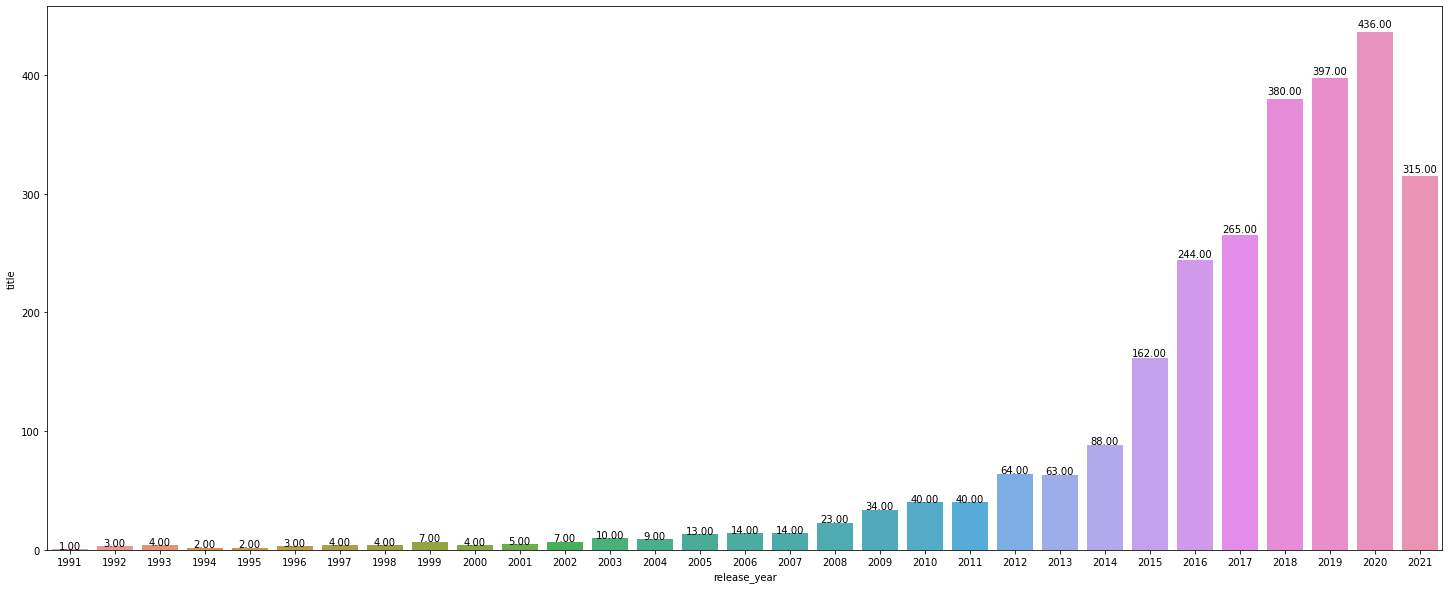

In [ ]:
plt.figure(figsize=(25,10))
plot_bar_graph(release_type_df_last_30_show, 'release_year', 'title')

**INSIGHTS**

SHOWS

1. There has been a hockey stick curve for tv shows content.
2. TV shows started to rise from year 2007+ and has scaled up since till year 2020
3. 2021 there was a drop which was lower than last 3 years.

#### Problem 4. Comparison of tv shows vs. movies.


In [ ]:
shows_df = df[df["type"]=="TV Show"]
movies_df = df[df["type"]=="Movie"]
shows_df.shape, movies_df.shape

((2676, 13), (6131, 13))

In [ ]:
type_rating_df = get_count_and_pct(df, ["type","rating"])
type_rating_df.head()

,type,rating,pct
0,Movie,TV-MA,0.234238
1,Movie,TV-14,0.162104
2,TV Show,TV-MA,0.130069
3,Movie,R,0.090537
4,TV Show,TV-14,0.083267


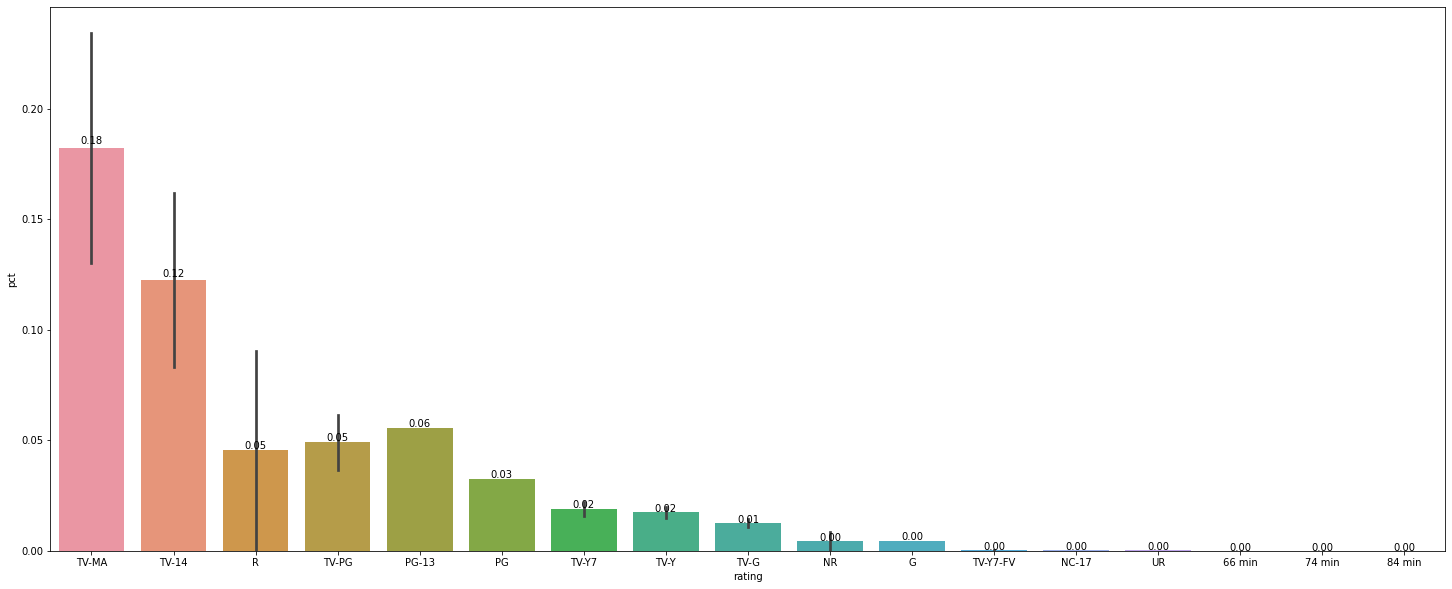

In [ ]:
plt.figure(figsize=(25,10))
plot_bar_graph(type_rating_df, 'rating', 'pct')

**INSIGHTS**

1. `TV-MA` is most common rating across `Movies/TV Shows` citing to `18%` of the total ratings
2. Few ratings like `TV-Y7-FV, NC-17, UR` are least given rating across Movies/TV Shows

In [ ]:
# Retrieve all unique ratings of movies / TV Shows
movies_rating_set = set(movies_df["rating"].unique())
tv_rating_set = set(shows_df["rating"].unique())

print(movies_rating_set, '\n', tv_rating_set)

{'TV-G', nan, 'R', '74 min', 'UR', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'TV-PG', '84 min', '66 min', 'TV-14', 'TV-Y7', 'TV-Y', 'TV-MA', 'PG-13', 'PG'} 
 {'TV-G', nan, 'R', 'NR', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'TV-MA'}


In [ ]:
movies_rating_set.difference(tv_rating_set)

{'66 min', '74 min', '84 min', 'G', 'NC-17', 'PG', 'PG-13', 'UR'}

**INSIGHTS**

1. All of the ratings presented for Movies are `superset of all the ratings.`
2. `Movies` have some extra ratings that are used to classify the content.
```
{'66 min', '74 min', '84 min', 'G', 'NC-17', 'PG', 'PG-13', 'UR'}
```



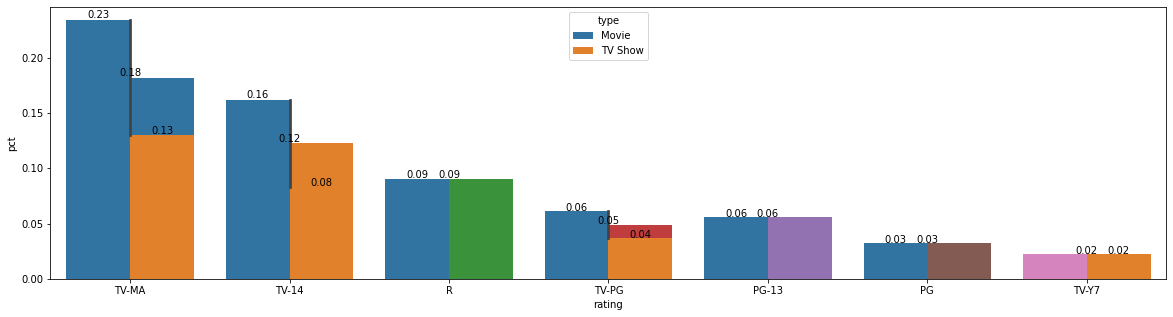

In [ ]:
top_records = 10
plt.figure(figsize=(20,5))
plot_bar_graph(type_rating_df.head(top_records), "rating", "pct", "type");

**INSIGHTS**

1. `TV-MA` is the most used rating for Movie/TV Shows
2. `R`, `PG-13` rating are some of the highest rated rating which is only in Movies

In [ ]:
director_type_df = df.groupby(['director', 'type'], as_index=False)[['title']].nunique()
director_type_df

,director,type,title
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4571,Çagan Irmak,Movie,1
4572,Ísold Uggadóttir,Movie,1
4573,Óskar Thór Axelsson,Movie,1
4574,Ömer Faruk Sorak,Movie,2


In [ ]:
shows_director_set = set(director_type_df[director_type_df["type"]=="TV Show"]["director"].unique())
movies_director_set = set(director_type_df[director_type_df["type"]=="Movie"]["director"].unique())
len(shows_director_set), len(movies_director_set)

(222, 4354)

In [ ]:
len(shows_director_set.intersection(movies_director_set))

48

**INSIGHTS**

1. There are `4354` directors for movies and `222` directors for TV Shows
2. `48` directors are common for Movie & TV Shows


In [ ]:
movies_df = df[df['type']=='Movie']
movies_df['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

#### Problem 5: What is the best time to launch a TV show?

<ipython-input-313-f5534dbb45bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_df["date_added"] = pd.to_datetime(tv_show_df["date_added"], utc=True)
<ipython-input-313-f5534dbb45bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_df['month_number'] = tv_show_df['date_added'].dt.month.fillna(0).astype(int)


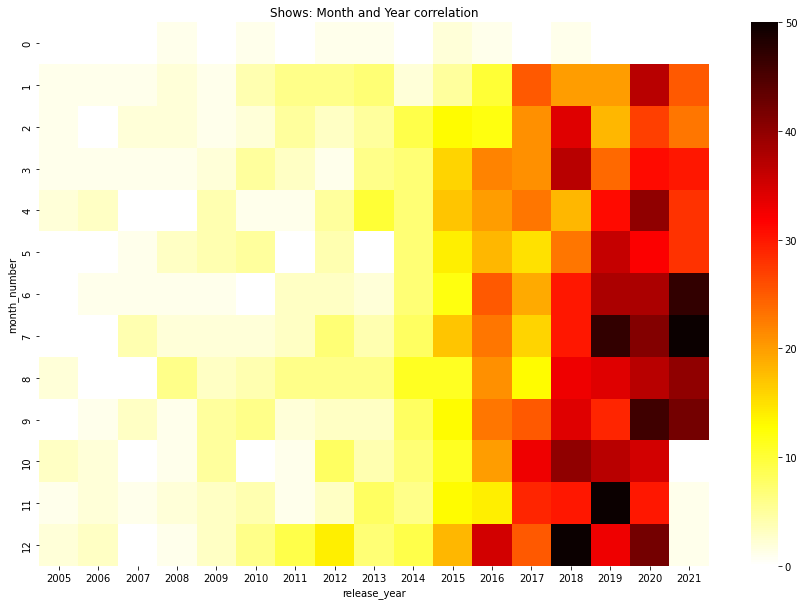

In [ ]:
tv_show_df = df[(df['type']=='TV Show') & (df['release_year'] > 2004)]

tv_show_df["date_added"] = pd.to_datetime(tv_show_df["date_added"], utc=True)
tv_show_df['month_number'] = tv_show_df['date_added'].dt.month.fillna(0).astype(int)
abc = tv_show_df.groupby('release_year')['month_number'].value_counts().unstack().fillna(0).T
fig=plt.figure(figsize=(15,10))
sns.heatmap(abc,cmap='hot_r')
plt.title('Shows: Month and Year correlation')
plt.show()

**INSIGHTS FOR TV SHOWS RELEASE TIME**

1. We are able to see a major surge in release around months `June, July, Sept, Nov, Dec`
2. `Nov` and `Dec` is 2 months when most of the TV shows are launched around 50 Shows.

<ipython-input-314-07b94eec6c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_month_df["date_added"] = pd.to_datetime(movie_month_df["date_added"], utc=True)
<ipython-input-314-07b94eec6c6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_month_df['month_number'] = movie_month_df['date_added'].dt.month.fillna(0).astype(int)


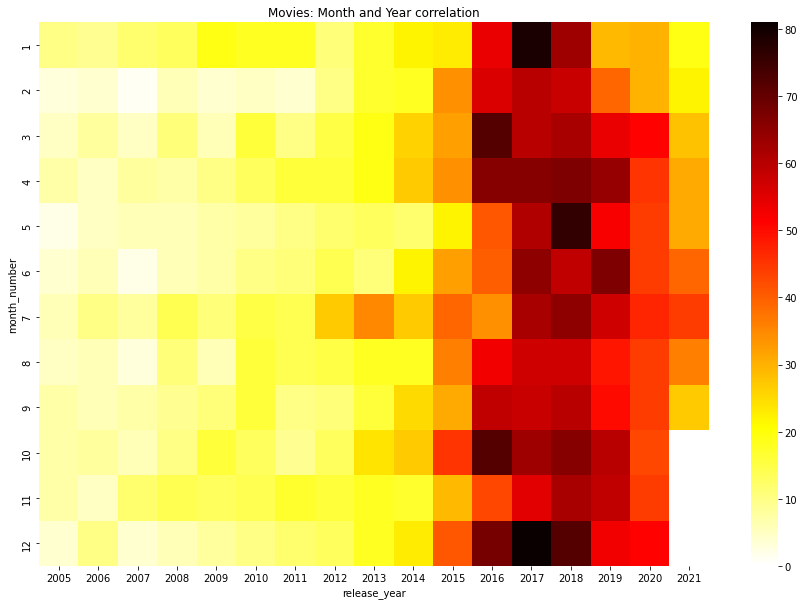

In [ ]:
movie_month_df = df[(df['type']=='Movie') & (df['release_year'] > 2004)]

movie_month_df["date_added"] = pd.to_datetime(movie_month_df["date_added"], utc=True)
movie_month_df['month_number'] = movie_month_df['date_added'].dt.month.fillna(0).astype(int)
abc = movie_month_df.groupby('release_year')['month_number'].value_counts().unstack().fillna(0).T
fig=plt.figure(figsize=(15,10))
sns.heatmap(abc,cmap='hot_r')
plt.title('Movies: Month and Year correlation')
plt.show()

<ipython-input-335-1db00363b57e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_month_india_df["date_added"] = pd.to_datetime(movie_month_india_df["date_added"], utc=True)
<ipython-input-335-1db00363b57e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_month_india_df['month_number'] = movie_month_india_df['date_added'].dt.month.fillna(0).astype(int)


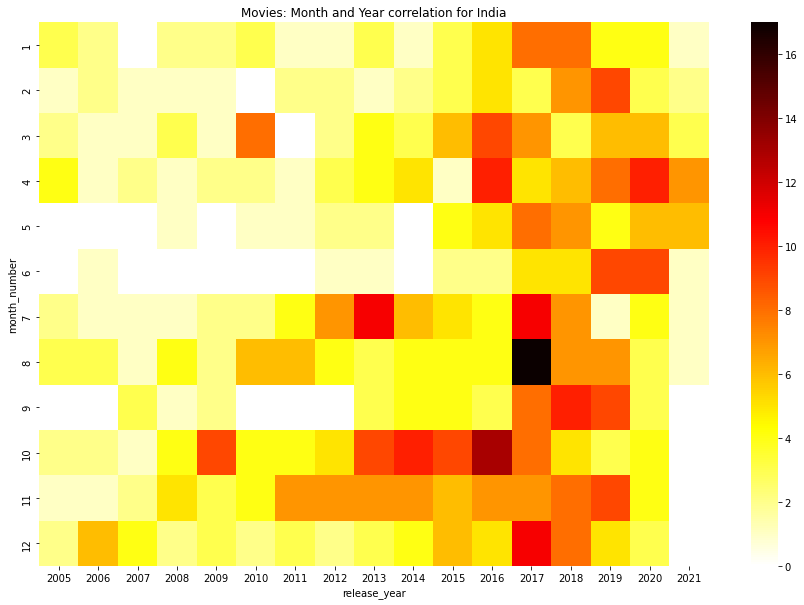

In [ ]:
movie_month_india_df = df[(df['type']=='Movie') & (df['release_year'] > 2004) & (df['country'] == 'India')]

movie_month_india_df["date_added"] = pd.to_datetime(movie_month_india_df["date_added"], utc=True)
movie_month_india_df['month_number'] = movie_month_india_df['date_added'].dt.month.fillna(0).astype(int)
abc = movie_month_india_df.groupby('release_year')['month_number'].value_counts().unstack().fillna(0).T
fig=plt.figure(figsize=(15,10))
sns.heatmap(abc,cmap='hot_r')
plt.title('Movies: Month and Year correlation for India')
plt.show()

**INSIGHTS FOR MOVIE RELEASE TIME**

1. We are able to see a major surge in release around months `March, April, Oct, Nov, Dec`
2. `April` and `Dec` is 2 months when most of the movies are launched around  Shows.
3. In `INDIA` higher no of movies were released around `Oct` which is basically diwali season. Just in year `2017` as trend was seen that highest movies were released in `Aug`

#### Problem 6: Analysis of actors/directors of different types of shows/movies.

In [ ]:
# as there multiple cast so first explode it
df["actor"] = df["cast"].str.split(', ')
df["actor"].head()

0                                                  NaN
1    [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
2    [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...
3                                                  NaN
4    [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...
Name: actor, dtype: object

In [ ]:
cast_tu_df = df[["show_id","type","title","director","release_year","actor","cast"]].explode('actor')
cast_tu_df.tail()

,show_id,type,title,director,release_year,actor,cast
8806,s8807,Movie,Zubaan,Mozez Singh,2015,Manish Chaudhary,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
8806,s8807,Movie,Zubaan,Mozez Singh,2015,Meghna Malik,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
8806,s8807,Movie,Zubaan,Mozez Singh,2015,Malkeet Rauni,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
8806,s8807,Movie,Zubaan,Mozez Singh,2015,Anita Shabdish,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
8806,s8807,Movie,Zubaan,Mozez Singh,2015,Chittaranjan Tripathy,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."


In [ ]:
# picking last 5 years of data
cast_tu_df = cast_tu_df[cast_tu_df['release_year']>2015]
cast_tu_df.tail()

,show_id,type,title,director,release_year,actor,cast
8797,s8798,TV Show,Zak Storm,NaN,2016,Christopher Smith,"Michael Johnston, Jessica Gee-George, Christin..."
8797,s8798,TV Show,Zak Storm,NaN,2016,Max Mittelman,"Michael Johnston, Jessica Gee-George, Christin..."
8797,s8798,TV Show,Zak Storm,NaN,2016,Reba Buhr,"Michael Johnston, Jessica Gee-George, Christin..."
8797,s8798,TV Show,Zak Storm,NaN,2016,Kyle Hebert,"Michael Johnston, Jessica Gee-George, Christin..."
8803,s8804,TV Show,Zombie Dumb,NaN,2018,NaN,NaN


In [ ]:
director_df = get_count_and_pct(cast_tu_df, 'director')
director_df.head(5) #top 5 directors

,director,pct
0,Fernando Ayllón,0.002548
1,Don Michael Paul,0.002387
2,Kunle Afolayan,0.002265
3,Cathy Garcia-Molina,0.002184
4,Niyi Akinmolayan,0.002023


In [ ]:
# Top 5 actors
actor_df = get_count_and_pct(cast_tu_df, 'actor')
actor_df.head()

,actor,pct
0,Vincent Tong,0.000625
1,Takahiro Sakurai,0.000625
2,Andrea Libman,0.000547
3,Yuki Kaji,0.000495
4,Fortune Feimster,0.000469


In [ ]:
# group top 5 actors and directors
actor_director_df = cast_tu_df.groupby(["director","actor"], as_index=False)[["title"]].nunique()
actor_director_filtered_df = actor_director_df[actor_director_df['title'] > 3].sort_values(["title"], ascending=False)
actor_director_filtered_df.head()

,director,actor,title
6626,Fernando Ayllón,Ricardo Quevedo,6
9900,Joey So,Joseph May,6
20939,Suhas Kadav,Saurav Chakraborty,5
9902,Joey So,Keith Wickham,5
17588,Rathindran R Prasad,Pavel Navageethan,4


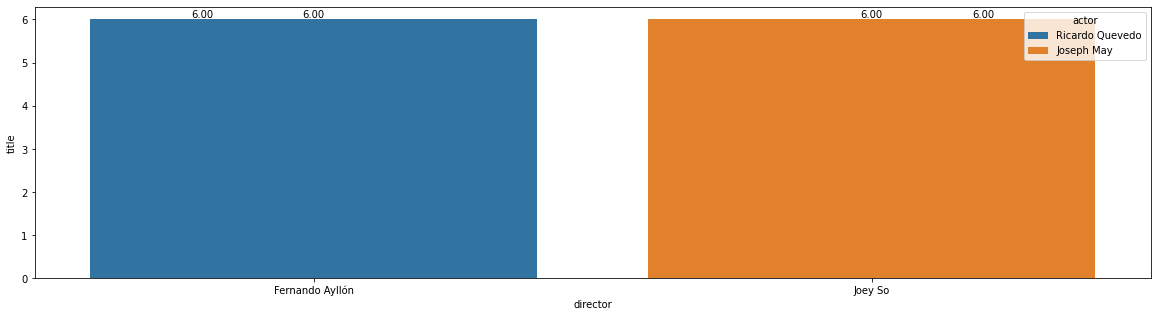

In [ ]:
# visualise data of director and actor with max count
title_count = 6
plt.figure(figsize=(20,5))
filtered_df = actor_director_df[actor_director_df["title"]==title_count].sort_values(["title"], ascending=False)
plot_bar_graph(filtered_df, "director", "title", "actor")

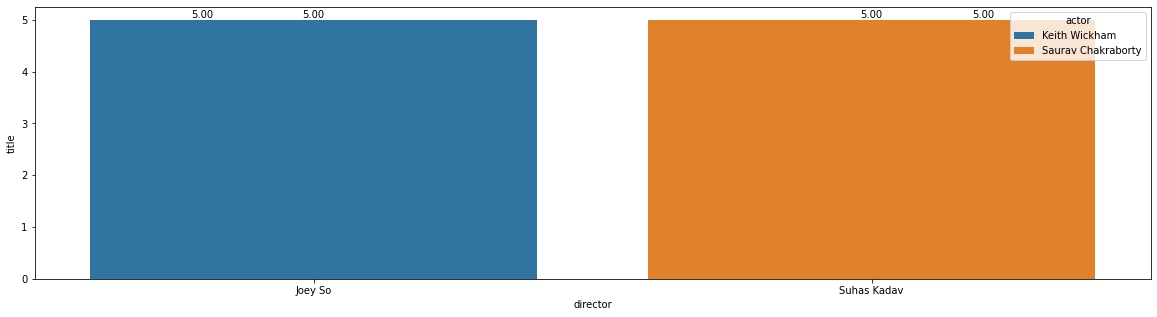

In [ ]:
# visualise data of director and actor with second max count

title_count = 5
plt.figure(figsize=(20,5))
filtered_df = actor_director_df[actor_director_df["title"]==title_count].sort_values(["title"], ascending=False)
plot_bar_graph(filtered_df, "director", "title", "actor")

#### Problem 7: Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:
show_movie_df = df[df['release_year']>=2001]
movie_df = show_movie_df.groupby(['release_year', 'type'], as_index=False)[['title']].nunique()
movie_df.tail()

,release_year,type,title
37,2019,TV Show,397
38,2020,Movie,517
39,2020,TV Show,436
40,2021,Movie,277
41,2021,TV Show,315


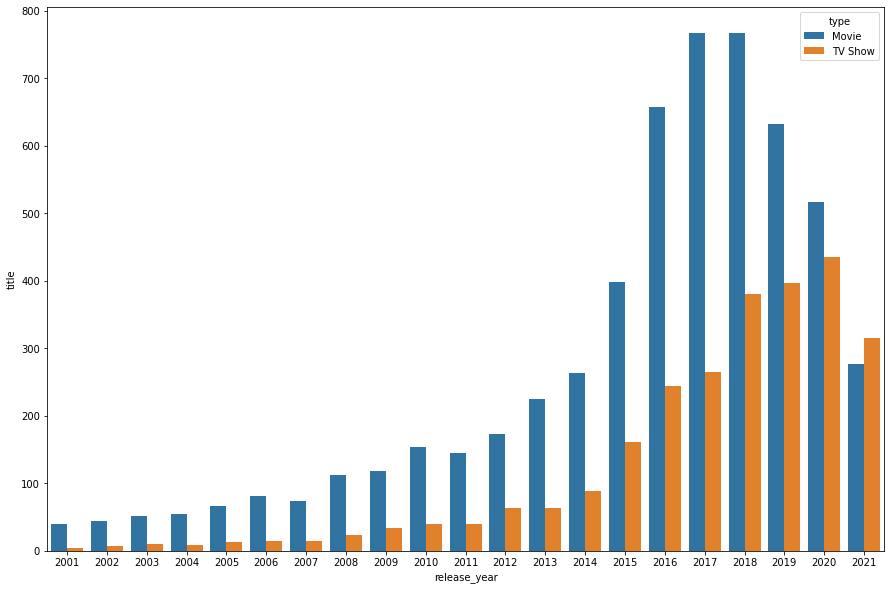

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.barplot(x = 'release_year', y = 'title', data = movie_df, hue='type')
plt.show()

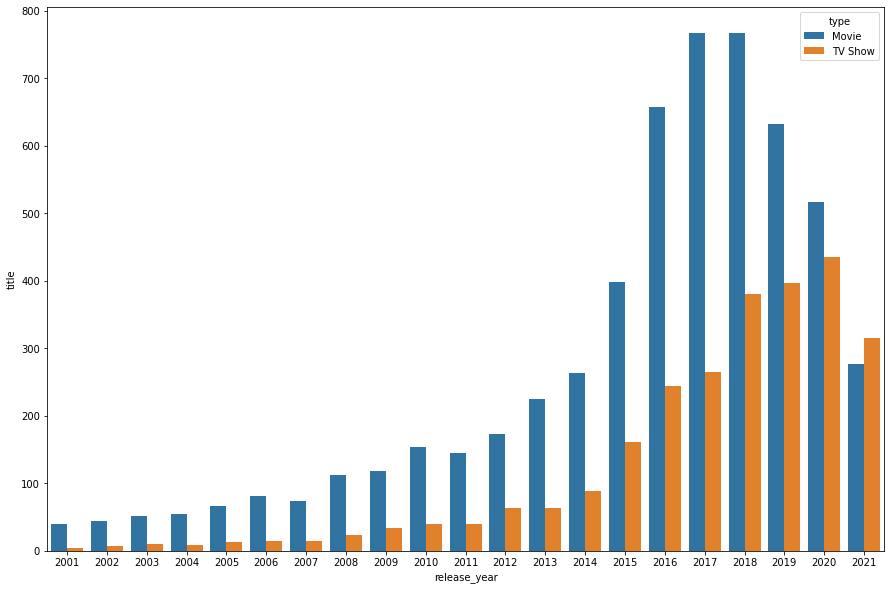

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.barplot(x = 'release_year', y = 'title', data = movie_df, hue='type')
plt.show()

**INSIGHTS**

1. Trend for TV Shows have increase from 2014 onwards.
2. In 2021, too even with a drop in TV shows launched there is still higher number of TV shows compared to Movies.
3. Movies trend has gone down drastically from 2018 onwards but still total number of movies released on netfix was always higher than TV shows till 2020.

We can fairly say that TV shows are being prioritised by netfix in recent years.

#### Problem 8: Understanding what content is available in different countries

Text(0.5, 0.98, 'Pair plot for shows on Netflix')

<Figure size 1080x720 with 0 Axes>

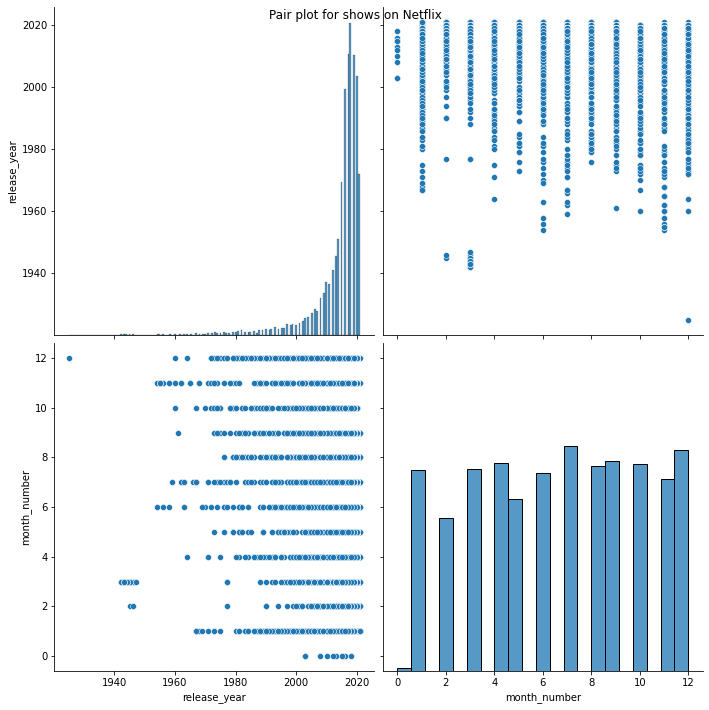

In [ ]:
fig=plt.figure(figsize=(15,10))
date_pair_df = df
date_pair_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
date_pair_df['month_number']=date_pair_df['date_added'].dt.month.fillna(0).astype(int)
pair=sns.pairplot(date_pair_df,height=5)
pair.fig.suptitle('Pair plot for shows on Netflix')

In [ ]:
# top 3 counties
df['country'].value_counts().head(3).reset_index()

,index,country
0,United States,2818
1,India,972
2,United Kingdom,419


<ipython-input-328-2a8f26634671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
<ipython-input-328-2a8f26634671>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['month_number'] = us_df['date_added'].dt.month.fillna(0).astype(int)


<Figure size 1080x720 with 0 Axes>

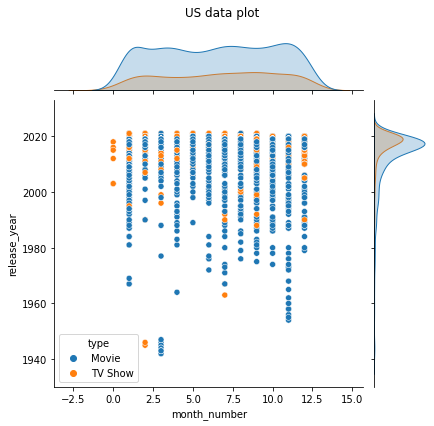

In [ ]:
us_df = df[df['country'] == 'United States']
us_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
us_df['month_number'] = us_df['date_added'].dt.month.fillna(0).astype(int)
fig=plt.figure(figsize=(15,10))
usd=sns.jointplot(x='month_number',y='release_year',data=us_df, hue='type')
usd.fig.subplots_adjust(top=0.9)
usd.fig.suptitle('US data plot')
plt.show()

**INSIGHTS**

As per seen in USA
1. Movies were always higher in no compared to TV Shows.
2. TV shows boom came around 2010+
3. There is slightly higher no of releases around Nov-Dec both for movies and TV Shows.

<ipython-input-329-385214d346dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
<ipython-input-329-385214d346dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df['month_number'] = in_df['date_added'].dt.month.fillna(0).astype(int)


<Figure size 1080x720 with 0 Axes>

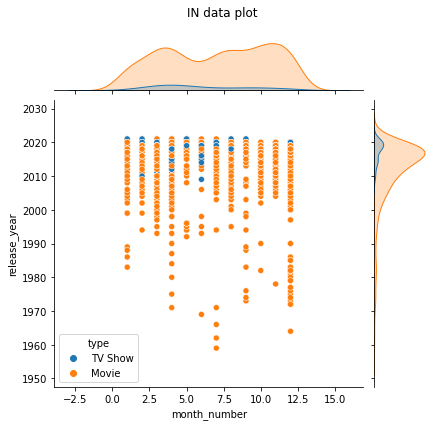

In [ ]:
in_df = df[df['country'] == 'India']
in_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
in_df['month_number'] = in_df['date_added'].dt.month.fillna(0).astype(int)
fig=plt.figure(figsize=(15,10))
usd=sns.jointplot(x='month_number',y='release_year',data=in_df, hue='type')
usd.fig.subplots_adjust(top=0.9)
usd.fig.suptitle('IN data plot')
plt.show()

**INSIGHTS**

As per seen in INDIA
1. `Movies` were most released content on netflix
2. `TV shows` was very few and `started emerging from 2010 above`
3. `Most releases` of movies were done during `March-April` & `Oct-Nov`

<ipython-input-330-22c7ed576e97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
<ipython-input-330-22c7ed576e97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['month_number'] = uk_df['date_added'].dt.month.fillna(0).astype(int)


<Figure size 1080x720 with 0 Axes>

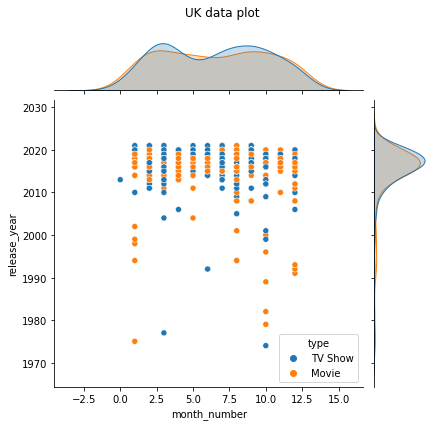

In [ ]:
uk_df = df[df['country'] == 'United Kingdom']
uk_df["date_added"] = pd.to_datetime(date_pair_df["date_added"], utc=True)
uk_df['month_number'] = uk_df['date_added'].dt.month.fillna(0).astype(int)
fig=plt.figure(figsize=(15,10))
usd=sns.jointplot(x='month_number',y='release_year',data=uk_df, hue='type')
usd.fig.subplots_adjust(top=0.9)
usd.fig.suptitle('UK data plot')
plt.show()

**INSIGHTS**

As per seen in UK
1. `Movies` & `TV shows` both are comparitvely equal in distribution
2. Boom for there releases on netflix stared from `2005 above`
3. `Most releases` of `TV shows` were done during `March-April` & `Sep-Oct`
4. `Most releases` of `Movies` were spread across year with some drop in `July-sept`

In [ ]:
movie_df = df[df['type']=='Movie']

movie_df["listed_in_split"] = movie_df["listed_in"].str.split(', ')
movie_df_new = movie_df.explode('listed_in_split')

<ipython-input-331-49fab14a7a25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["listed_in_split"] = movie_df["listed_in"].str.split(', ')


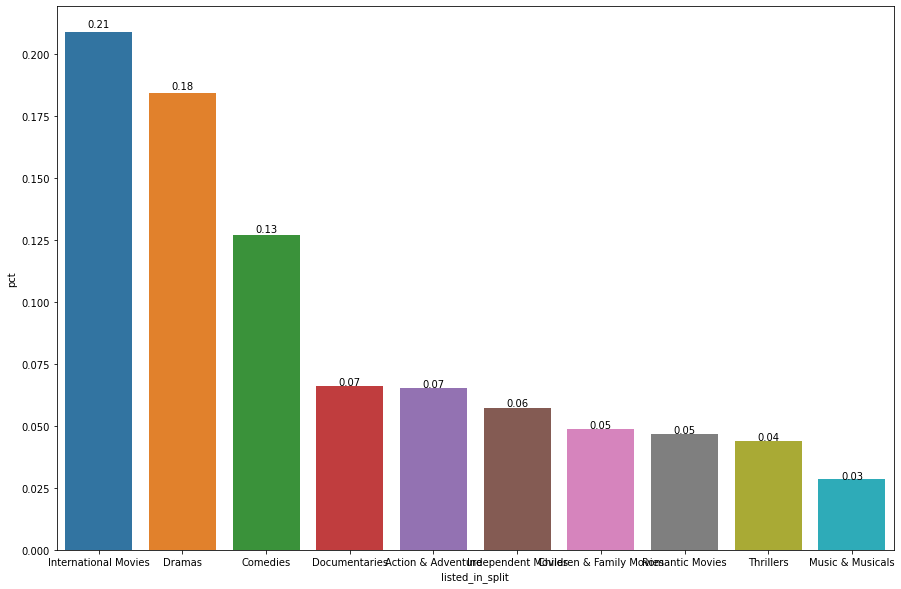

In [ ]:
df_new = get_count_and_pct(movie_df_new, ['listed_in_split'])
fig=plt.figure(figsize=(15,10))
plot_bar_graph(df_new.head(10), "listed_in_split", "pct");

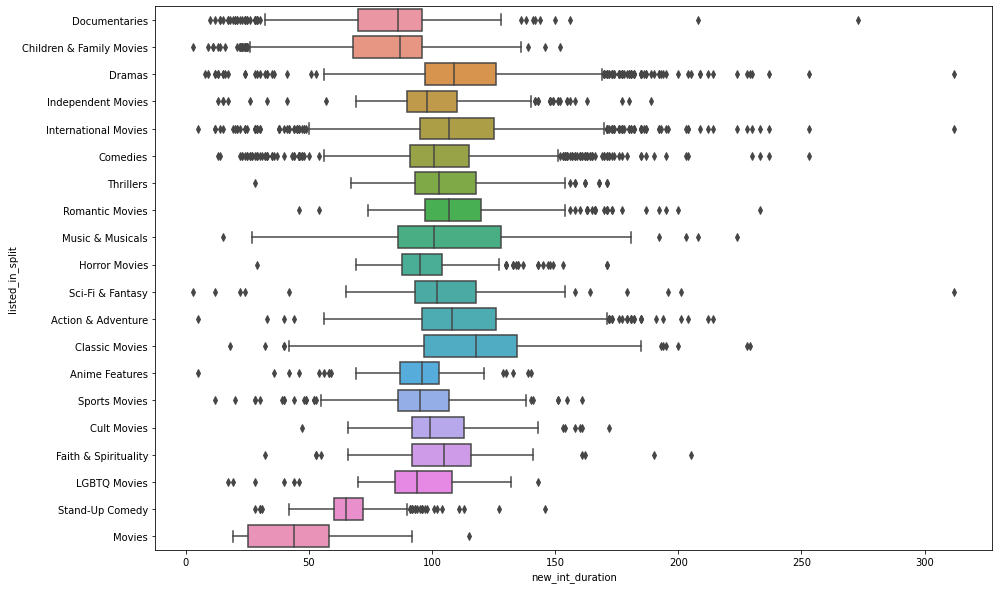

In [ ]:
movie_df_new['new_int_duration'] = movie_df_new['duration'].str.split(' ').str[0]
movie_df_new['new_int_duration'] = pd.to_numeric(movie_df_new['new_int_duration'])

fig=plt.figure(figsize=(15,10))
sns.boxplot(data=movie_df_new, y="listed_in_split", x="new_int_duration")
usd.fig.suptitle('Duration of movies')
plt.show()

**INSIGHTS**

1. `Movie` listed as `Movies` had the least duration
2. `International Movies` has the most content published in netflix
3. Majority of the movies listed were around `100-120 min` in duration
4. Most watched genres of movies was `Internation Movies` `Dramas` & `comedies`


**RECOMMENDATIONS**

1. Netflix should broaden its scope of content release. For now `US` is the most prominent country where the content is released. Netflix should focus on releasing more content in `India` & `UK` their next goto market.
2. Movies content has drastically dropped since `2018`. Thus netflix can work on getting that back to speed
3. Netflix should also promote the content
  **3.1** Movies with `International Movies` should be promoted as the content is already higher in netflix
  **3.2** Movies with genre `Movies` should be properly catergorised to one of the batch. This might help to promote and do a better search in their platform
4. Netflix can also launch more `Movies` and `TV Show` in less released months like `Feburary` (Better romantic movies / tv shows) can be released and promoted during that time. It should also consider festive time of releases. As the data is heavy on `US` side so the movies/TV shows are being launched more around `Oct-Dec` which is primarily the festive season `Christmas`
5. Directors like `Joey So` and `Suhas Kadav` should be promoted as they have higher uploaded content on netflix.
6. Actors who have higher no of movies can be made ambasadors or given long term contracts and made promotion means of their content in Netflix.